1. Item_Identifier will not affect the Item_Outlet_Sales
2. because we love fatty food Item_Fat_Content may affect the Item_Outlet_Sales
3. Item_Visibility may have effect on the Item_Outlet_Sales
4. Item_Weight may show a positve correlation with Item_Outlet_Sales
5. Item_Type may affect on the Item_Outlet_Sales as we buy the imporrant items
6. Item_MRP may have high correlation with Item_Outlet_Sales
7. Outlet_Identifier may have high correlation because of the difference of popularity
8. Outlet_Establishment_Year can affect sales because older stores tend to be more popular
9. Outlet_Size may affect sales because bigger stores tend to service more pepole
10. Outlet_Location_Type may affect the sales
11. Outlet_Type may affect sales because more customers tend to go to supermarkets

In [441]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/my_data/Train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/my_data/Test.csv')

In [442]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [443]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


looking for any dublicated rows

In [444]:
duplicate = data.duplicated()
print(duplicate.sum())
duplicate = X_test.duplicated()
print(duplicate.sum())

0
0


handling missing values

In [445]:
missing_values=data.isnull().sum()
print(missing_values[missing_values>0])

Item_Weight    1463
Outlet_Size    2410
dtype: int64


In [446]:
missing_values=X_test.isnull().sum()
print(missing_values[missing_values>0])

Item_Weight     976
Outlet_Size    1606
dtype: int64


In [447]:
data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [448]:
data['Item_Weight'].replace(to_replace = np.nan, value =data.Item_Weight.median(), inplace=True)
X_test['Item_Weight'].replace(to_replace = np.nan, value =data.Item_Weight.median(), inplace=True)
#data['Outlet_Size']=data['Outlet_Size'].fillna(method='bfill', axis=0).fillna('Medium')

In [449]:
def implacing (row):
    if row.Outlet_Identifier == 'OUT010' : return 'Small'
    elif row.Outlet_Identifier == 'OUT017' : return 'Medium'
    elif row.Outlet_Identifier == 'OUT045' : return 'Medium'
    else : return row.Outlet_Size
data.Outlet_Size = data.apply(implacing,axis='columns')
X_test.Outlet_Size = X_test.apply(implacing,axis='columns')

handling outliers

<Axes: >

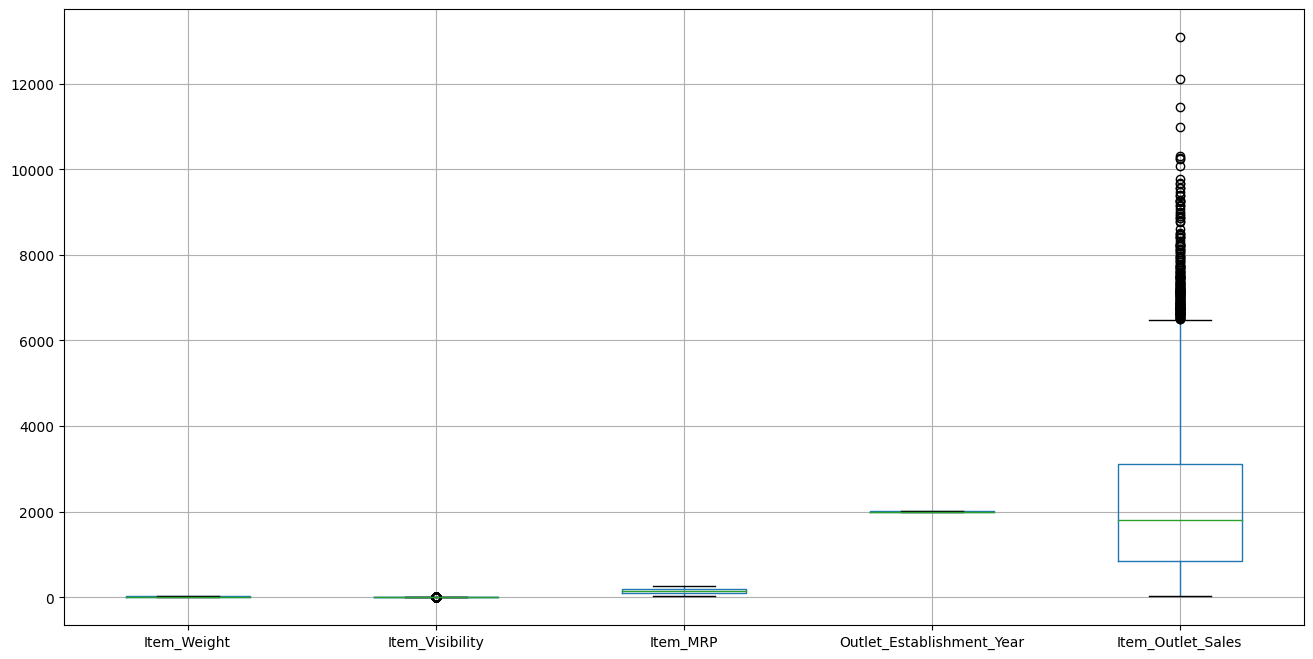

In [450]:
plt.figure(figsize=(16,8))
data.boxplot()

<Axes: >

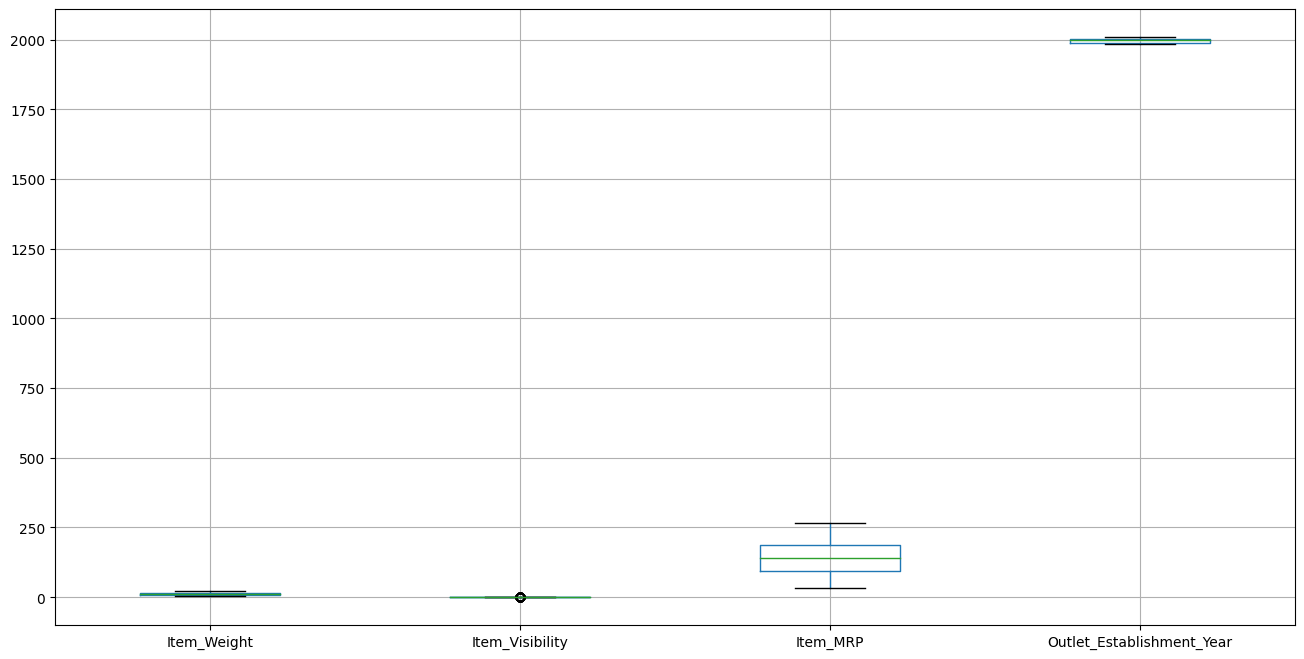

In [451]:
plt.figure(figsize=(16,8))
X_test.boxplot()

In [452]:
#removing outliers in Item_Visibility and Item_Outlet_Sales have outliers in data
sorted(data['Item_Visibility'])
Q1,Q3=data['Item_Visibility'].quantile([0.25,0.75])
IQR=Q3-Q1
lower_range=Q1-(1.5*IQR)
upper_range=Q3+(1.5*IQR)

data.Item_Visibility=np.where(data.Item_Visibility>upper_range,upper_range,data.Item_Visibility)
data.Item_Visibility=np.where(data.Item_Visibility<lower_range,lower_range,data.Item_Visibility)

In [453]:
sorted(data['Item_Outlet_Sales'])
Q1,Q3=data['Item_Outlet_Sales'].quantile([0.25,0.75])
IQR=Q3-Q1
lower_range=Q1-(1.5*IQR)
upper_range=Q3+(1.5*IQR)

data.Item_Outlet_Sales=np.where(data.Item_Outlet_Sales>upper_range,upper_range,data.Item_Outlet_Sales)
data.Item_Outlet_Sales=np.where(data.Item_Outlet_Sales<lower_range,lower_range,data.Item_Outlet_Sales)

In [454]:
#removing outliers in Item_Visibility have outliers in X_test
sorted(X_test['Item_Visibility'])
Q1,Q3=X_test['Item_Visibility'].quantile([0.25,0.75])
IQR=Q3-Q1
lower_range=Q1-(1.5*IQR)
upper_range=Q3+(1.5*IQR)

X_test.Item_Visibility=np.where(X_test.Item_Visibility>upper_range,upper_range,X_test.Item_Visibility)
X_test.Item_Visibility=np.where(X_test.Item_Visibility<lower_range,lower_range,X_test.Item_Visibility)

after removing the outliers

<Axes: >

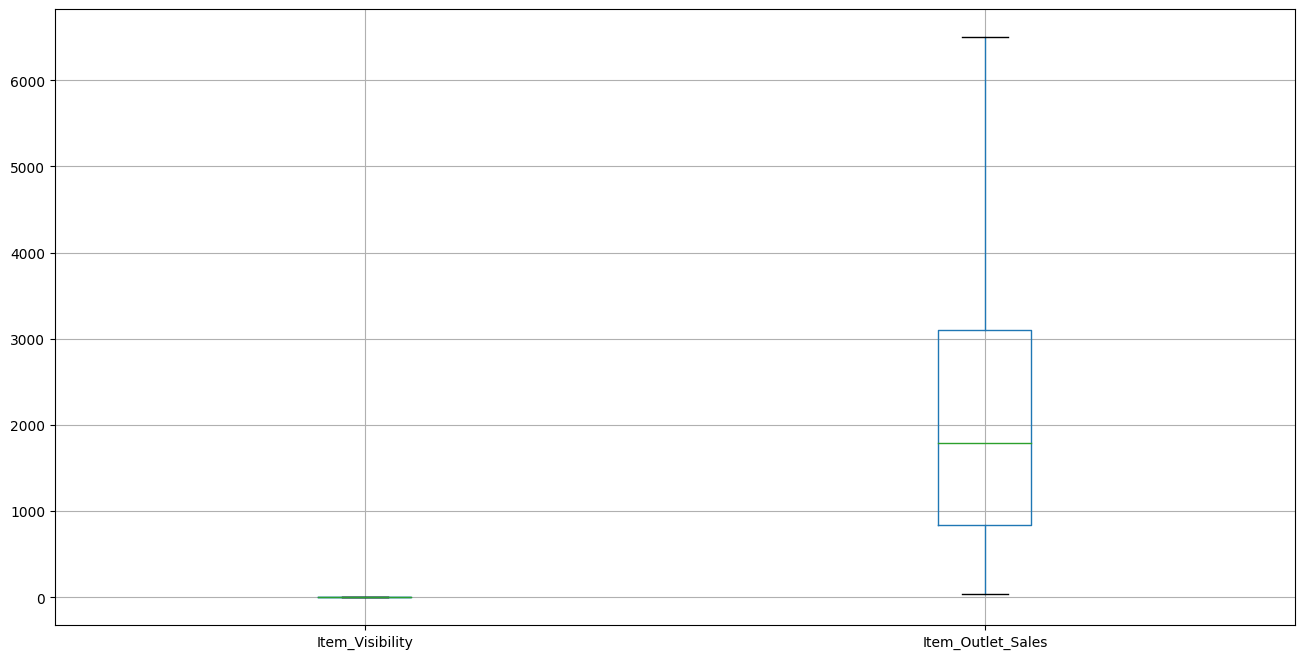

In [455]:
plt.figure(figsize=(16,8))
cols_3=['Item_Visibility', 'Item_Outlet_Sales']
data.boxplot(column=cols_3)

<Axes: >

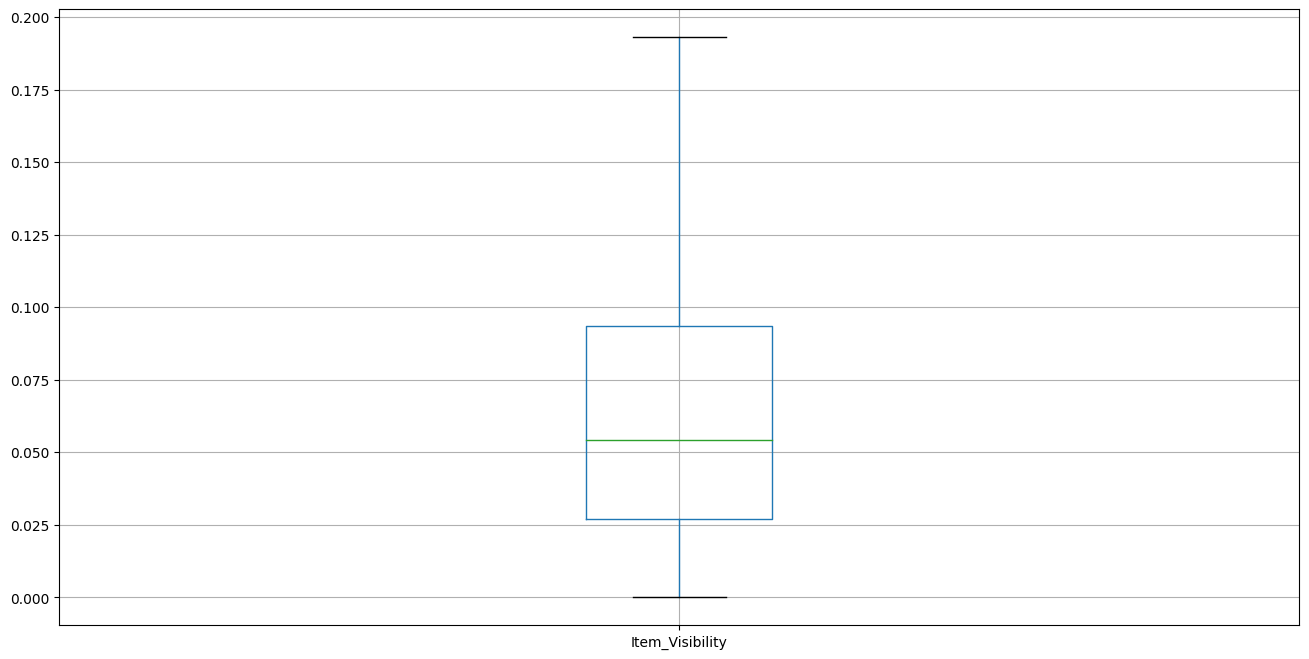

In [456]:
plt.figure(figsize=(16,8))
X_test.boxplot(column='Item_Visibility')

handling Inconsistent data entry

In [457]:
print(data['Item_Fat_Content'].unique())
print(X_test['Item_Fat_Content'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Low Fat' 'reg' 'Regular' 'LF' 'low fat']


In [458]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].str.lower()
data.loc[data['Item_Fat_Content']=='lf', 'Item_Fat_Content'] = 'low fat'
data.loc[data['Item_Fat_Content']=='reg', 'Item_Fat_Content'] = 'regular'
X_test['Item_Fat_Content'] = X_test['Item_Fat_Content'].str.lower()
X_test.loc[X_test['Item_Fat_Content']=='lf', 'Item_Fat_Content'] = 'low fat'
X_test.loc[X_test['Item_Fat_Content']=='reg', 'Item_Fat_Content'] = 'regular'

columns splitting

In [459]:
num_cols=['Item_Weight','Item_Visibility','Item_MRP']
cate_cols=['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type','Outlet_Establishment_Year']
cols= num_cols + cate_cols

data analysis

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

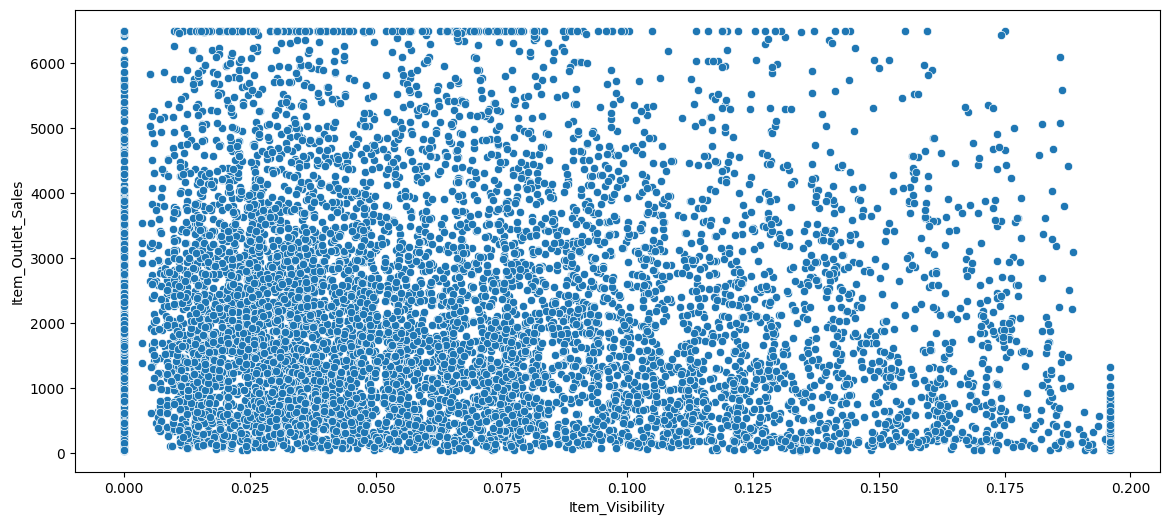

In [460]:
plt.figure(figsize=(14,6))
sns.scatterplot(x=data['Item_Visibility'], y=data['Item_Outlet_Sales'])

In [461]:
data['Item_Visibility'].replace(to_replace = 0, value =data.Item_Visibility.mean(), inplace=True)
X_test['Item_Visibility'].replace(to_replace = 0, value =X_test.Item_Visibility.mean(), inplace=True)

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

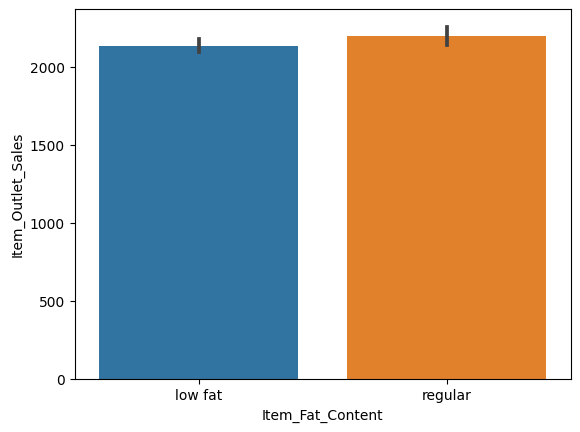

In [462]:
sns.barplot(x=data.Item_Fat_Content, y=data.Item_Outlet_Sales)

there is a small correlation between Item_Fat_Content and Item_Outlet_Sales

<Axes: xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

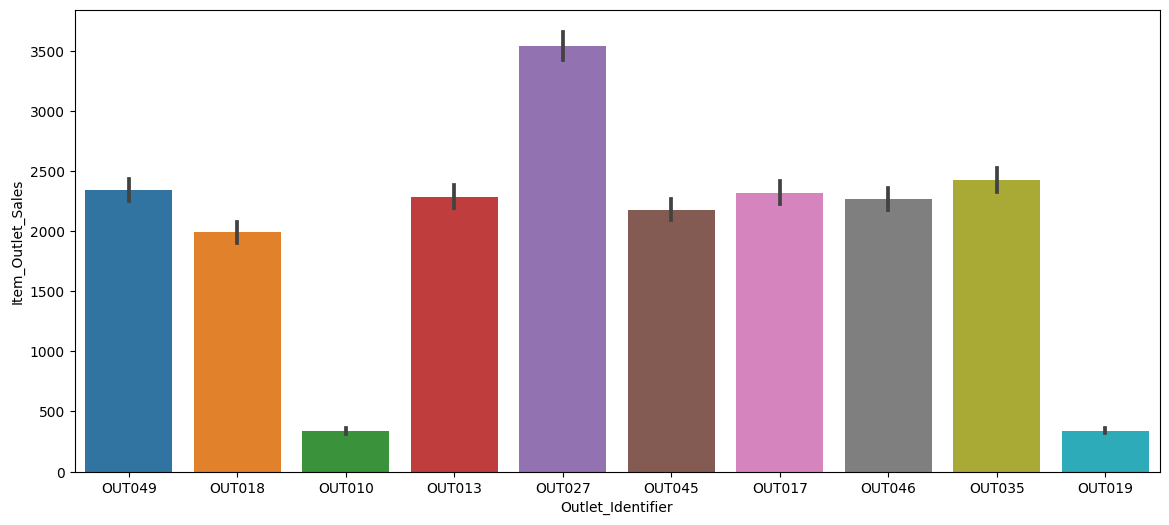

In [463]:
plt.figure(figsize=(14,6))
sns.barplot(x=data.Outlet_Identifier, y=data.Item_Outlet_Sales)

OUT019 and OUT010 are doing bad while OUT027 is the best

<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

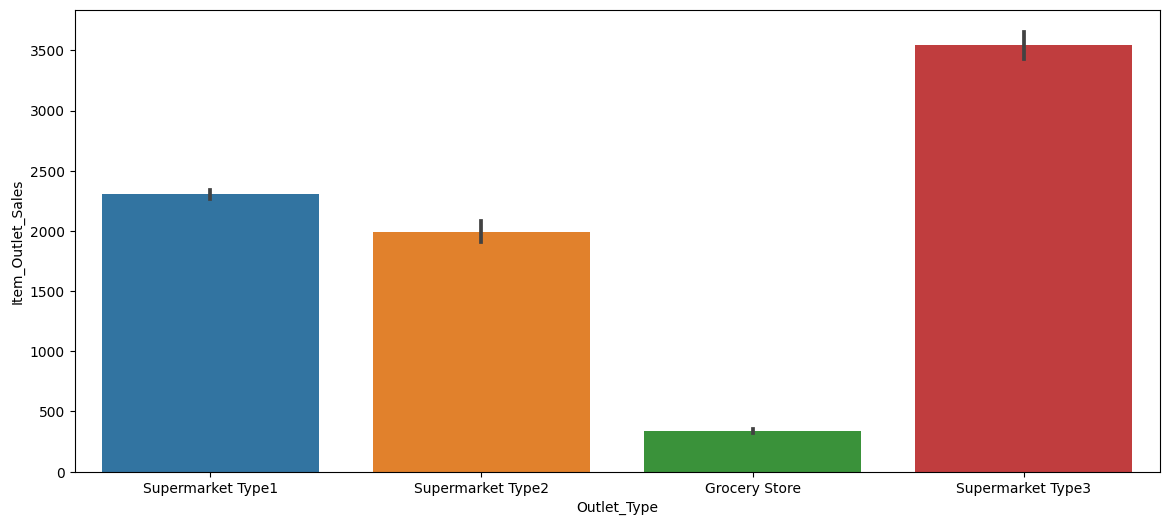

In [464]:
plt.figure(figsize=(14,6))
sns.barplot(x=data.Outlet_Type, y=data.Item_Outlet_Sales)

Grocery Store [OUT019, OUR010] are the lowest in Item_Outlet_Sales, Supermarket Type3 [OUT027] is the highest in Item_Outlet_Sales, followed by Supermarket Type1 [OUT013, OUT017, OUT035, OUT045, OUT046, OUT049], followed by Supermarket Type2 [OUT018]


<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

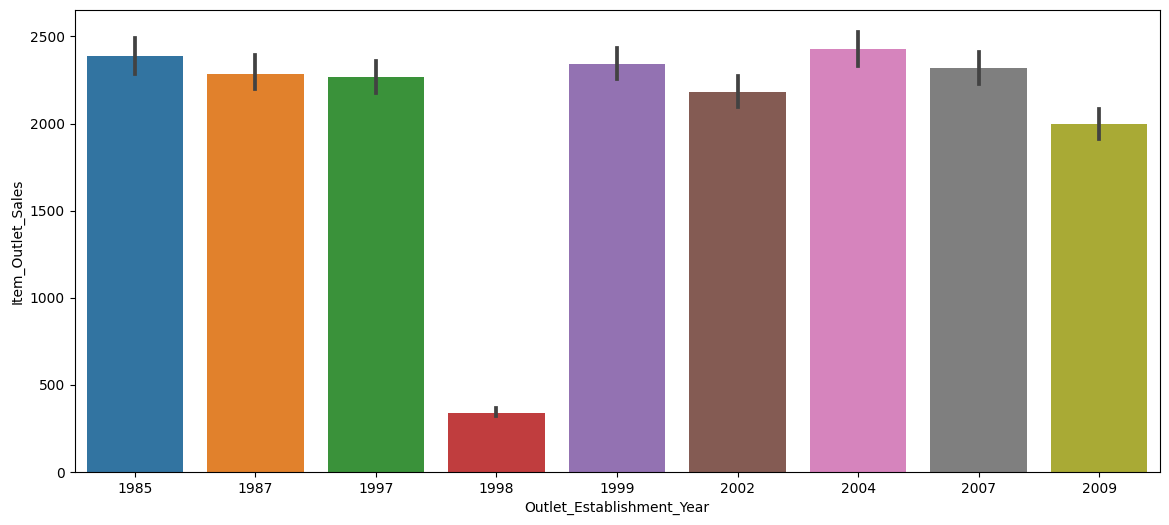

In [465]:
plt.figure(figsize=(14,6))
sns.barplot(x=data.Outlet_Establishment_Year, y=data.Item_Outlet_Sales)

OUT027 and OUT019 established at the same year and OUT027 is the most selling store while OUT019 is the least selling which means that there isn't much correlation between the sales and year  

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

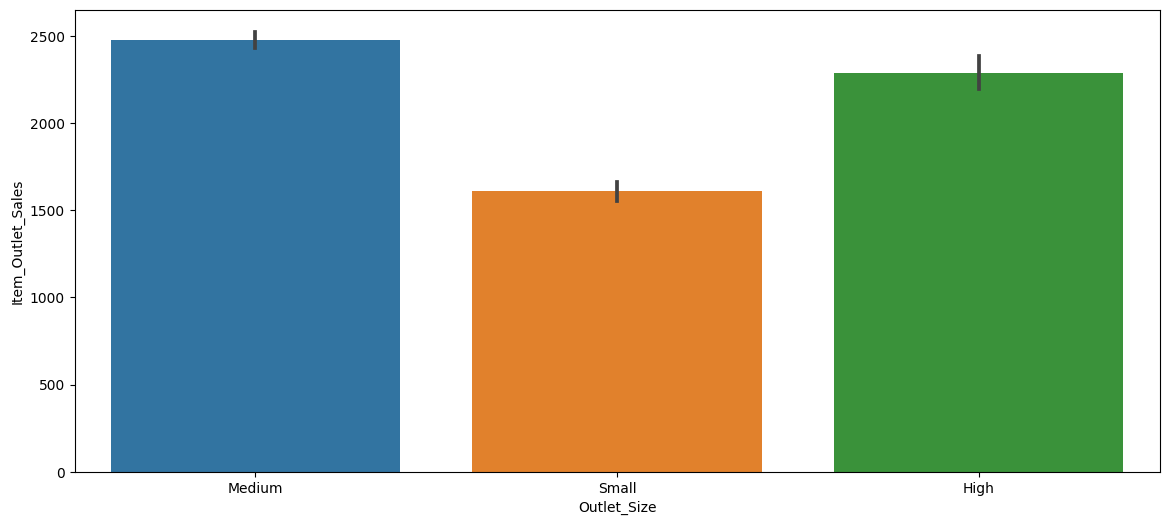

In [466]:
plt.figure(figsize=(14,6))
sns.barplot(x=data.Outlet_Size, y=data.Item_Outlet_Sales)

<Axes: xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

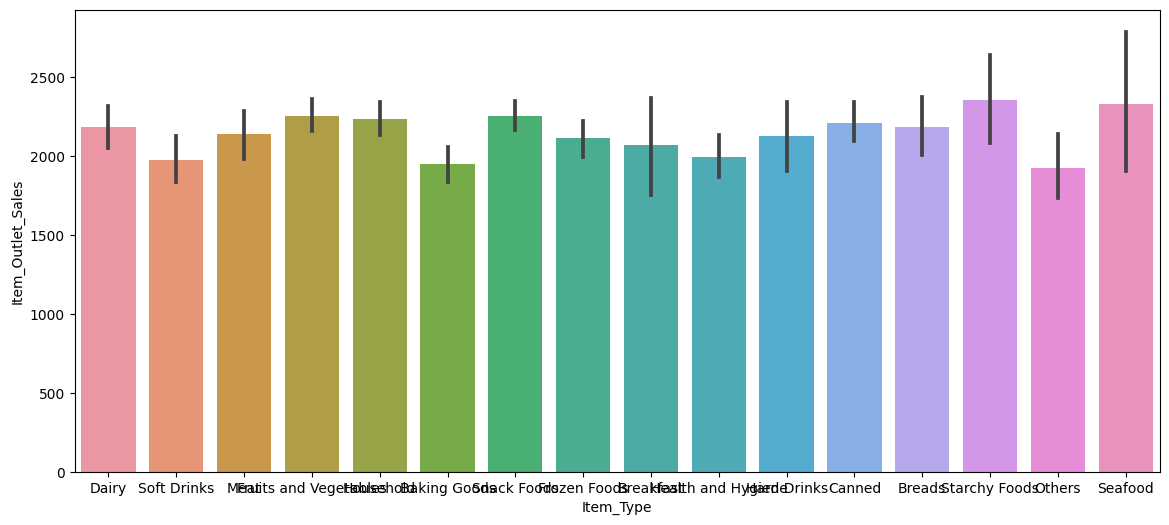

In [467]:
plt.figure(figsize=(14,6))
sns.barplot(x=data.Item_Type, y=data.Item_Outlet_Sales)

In [468]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,regular,0.065307,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,low fat,0.065307,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,low fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,low fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


Ordinal Encoding and One-Hot Encoding


In [469]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
cols_1 = ['Outlet_Type', 'Outlet_Size']
data[cols_1] = ordinal_encoder.fit_transform(data[cols_1])
#X_test
X_test[cols_1] = ordinal_encoder.fit_transform(X_test[cols_1])

In [470]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
cols_2 = ['Item_Type', 'Outlet_Location_Type', 'Outlet_Identifier', 'Item_Fat_Content']
OH_data = pd.DataFrame(OH_encoder.fit_transform(data[cols_2]))
OH_data.index = data.index
data.drop(cols_2, axis=1, inplace=True)
data = pd.concat([OH_data, data], axis=1)
data.columns = data.columns.astype(str)
#X_test
OH_X_test = pd.DataFrame(OH_encoder.fit_transform(X_test[cols_2]))
OH_X_test.index = X_test.index
X_test.drop(cols_2, axis=1, inplace=True)
X_test = pd.concat([OH_X_test, X_test], axis=1)
X_test.columns = X_test.columns.astype(str)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [471]:
y=data.Item_Outlet_Sales
X=data.drop(['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Establishment_Year'], axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=3)

XGBRegressor

In [472]:
from xgboost import XGBRegressor

XGBR_model = XGBRegressor(n_estimators=2000, learning_rate=0.05, n_jobs=4, random_state=3)
XGBR_model.fit(X_train, y_train,  early_stopping_rounds=4, eval_set=[(X_valid, y_valid)], verbose=False)
predictions_1 = XGBR_model.predict(X_valid)
print(mean_absolute_error(predictions_1, y_valid))

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


724.5624221176442


Random Forest Regressor

In [473]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=9)
forest_model.fit(X_train, y_train)
predictions_2 = forest_model.predict(X_valid)
print(mean_absolute_error (y_valid,predictions_2))

752.6635247577713


Linear Regression

In [474]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
LR_model.fit(X_train, y_train)
predictions_3 = LR_model.predict(X_valid)
print(mean_absolute_error (y_valid,predictions_3))

794.9646718390062


Regularized Linear Regression

In [475]:
from sklearn.linear_model import Ridge
import numpy as np
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
Rigid_model = Ridge(alpha=1.0)
Rigid_model.fit(X_train, y_train)
Ridge()
predictions_4 = Rigid_model.predict(X_valid)
print(mean_absolute_error (y_valid,predictions_4))

794.931402915414


predictions on the X_test using the best modle

In [476]:
x_test=X_test.drop(['Item_Identifier', 'Outlet_Establishment_Year'], axis=1)
XGBR_model_pred = XGBRegressor(n_estimators=2000, learning_rate=0.05, n_jobs=4, random_state=3)
XGBR_model_pred.fit(X, y,  early_stopping_rounds=4, eval_set=[(X_valid, y_valid)], verbose=False)
test_preds = XGBR_model_pred.predict(x_test)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [477]:
output = pd.DataFrame({'Item_Identifier': X_test.Item_Identifier, 'Item_Outlet_Sales': test_preds})
output.to_csv('mini_project.csv', index=False)

In [478]:
test_preds

array([1202.6996, 1343.8071,  489.3974, ..., 1710.5403, 4276.679 ,
       1704.9557], dtype=float32)

In [479]:
output

,Item_Identifier,Item_Outlet_Sales
0,FDW58,1202.699585
1,FDW14,1343.807129
2,NCN55,489.397400
3,FDQ58,2723.546387
4,FDY38,5461.994141
...,...,...
5676,FDB58,2544.618408
5677,FDD47,2781.091553
5678,NCO17,1710.540283
5679,FDJ26,4276.679199
